## Extract original features from dataframe and run feature factory to get new features

In [6]:
import pandas as pd
import numpy as np
import sklearn
import sys
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
sys.path.append('..')
from utils.features import FeatureEngineering as FE
from utils.model_eval import ModelEvaluation

df_actors = pd.read_csv('../data/train.csv')
modelClass = ModelEvaluation()
FEClass = FE()

# Extract original features
original_features = list(df_actors.columns)
original_features.append("Lead numeric")
original_features

# Run feature factory to engineer all features

feature_factory = FE()
feature_factory.run_feature_engineering(
    df_actors,
    scaling=False,
    add_numeric_class_column=True,
    total_actors=True,
    relative_shares=True,
    ratios=True,
    decade=True,
    decade_gross_ratio=True,
    differences=True,
    abs_diff=True,
    yearly_mean=True,
    yearly_mean_diff=True,
)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,...,Yearly mean diff Number of words lead,Yearly mean diff Difference in words lead and co-lead,Yearly mean diff Number of male actors,Yearly mean diff Number of female actors,Yearly mean diff Number words male,Yearly mean diff Gross,Yearly mean diff Mean Age Male,Yearly mean diff Mean Age Female,Yearly mean diff Age Lead,Yearly mean diff Age Co-Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,...,3400.882353,3399.911765,6.911765,-0.852941,3364.235294,-64.676471,-9.986253,-7.721359,-5.117647,-30.117647
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,...,2434.567568,1482.351351,-0.783784,-0.621622,-750.108108,68.864865,-0.213318,3.513385,-22.297297,-0.405405
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,...,755.500000,131.500000,1.500000,0.000000,454.500000,-102.000000,0.600000,4.500000,-0.500000,4.500000
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,...,55.000000,-559.702703,-4.216216,1.162162,-1277.378378,91.729730,5.343877,13.257207,4.594595,11.189189
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,...,-735.600000,-1039.866667,-0.533333,-0.533333,843.733333,84.533333,-4.084868,-11.706667,-2.400000,-1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,...,350.000000,-141.750000,3.500000,1.000000,2737.500000,256.000000,-3.191667,-0.500000,-7.250000,7.250000
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,...,1795.461538,2177.076923,2.615385,0.615385,-1516.384615,-56.307692,4.291047,7.827930,15.538462,0.846154
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,...,3783.577778,2485.000000,6.000000,0.244444,4295.933333,40.977778,13.488100,6.879841,10.311111,9.022222
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,...,2821.969697,2173.272727,0.424242,0.333333,2441.030303,73.393939,0.071041,-3.494949,10.030303,0.575758


## Models using the "basic" (given) features

In [8]:
# Select data to use and perform scaling
target = df_actors["Lead numeric"]
features = df_actors[original_features].drop(["Lead", "Lead numeric"], axis="columns")

# Instantiate LDA model
lda_model = LDA()

# Run cross-validation
ModelEvaluation().cross_val(
    lda_model, features, target, nb_folds=5
)

# Instantiate QDA model
qda_model = QDA()

# Run cross-validation
ModelEvaluation().cross_val(
    qda_model, features, target, nb_folds=5
)

----------- Cross-validation report -----------

Model: LinearDiscriminantAnalysis()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Performance:
- Accuracy: 0.869 (avg), 0.846 (min), 0.904 (max)
- Accuracy, 95.0 % confidence interval: 0.775-0.963
- Accuracy, female: 0.590 (avg), 0.529 (min), 0.647 (max)
- Accuracy, male: 0.959 (avg), 0.924 (min), 0.987 (max)
- Training accuracy: 0.868 (avg), 0.860 (min), 0.877 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: QuadraticDiscriminantAnalysis()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gr

c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Models with "select" subset of features from permutation testing

In [10]:
# Select data to use
target = df_actors["Lead numeric"]
features = df_actors[
    [
        "Total words",
        "Number of words lead",
        "Difference in words lead and co-lead",
        "Number of female actors",
        "Number of male actors",
        "Age Lead",
        "Age Co-Lead",
        "Year",
    ]
]

# Instantiate LDA model
lda_model = LDA()

# Run cross-validation
ModelEvaluation().cross_val(
    lda_model, features, target, nb_folds=5
)

# Instantiate QDA model
qda_model = QDA()

# Run cross-validation
ModelEvaluation().cross_val(
    qda_model, features, target, nb_folds=5
)

----------- Cross-validation report -----------

Model: LinearDiscriminantAnalysis()

Feature set: ['Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number of male actors', 'Age Lead', 'Age Co-Lead', 'Year']

Number of folds: 5

Performance:
- Accuracy: 0.790 (avg), 0.779 (min), 0.808 (max)
- Accuracy, 95.0 % confidence interval: 0.696-0.884
- Accuracy, female: 0.362 (avg), 0.314 (min), 0.431 (max)
- Accuracy, male: 0.929 (avg), 0.898 (min), 0.962 (max)
- Training accuracy: 0.799 (avg), 0.797 (min), 0.806 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: QuadraticDiscriminantAnalysis()

Feature set: ['Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number of male actors', 'Age Lead', 'Age Co-Lead', 'Year']

Number of folds: 5

Performance:
- Accuracy: 0.801 (avg), 0.764 (min), 0.827 (max)
- Accuracy, 95.0 % confid

## Features based on manual inspection
Number words female added compared to the previous model.

In [11]:
# Select data to use
target = df_actors["Lead numeric"]
features = df_actors[
    [
        "Number words female",
        "Total words",
        "Number of words lead",
        "Difference in words lead and co-lead",
        "Number of female actors",
        "Number of male actors",
        "Age Lead",
        "Age Co-Lead",
        "Year",
    ]
]

# Instantiate LDA model
lda_model = LDA()

# Run cross-validation
ModelEvaluation().cross_val(
    lda_model, features, target, nb_folds=5
)

# Instantiate QDA model
qda_model = QDA()

# Run cross-validation
ModelEvaluation().cross_val(
    qda_model, features, target, nb_folds=5
)


----------- Cross-validation report -----------

Model: LinearDiscriminantAnalysis()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number of male actors', 'Age Lead', 'Age Co-Lead', 'Year']

Number of folds: 5

Performance:
- Accuracy: 0.868 (avg), 0.846 (min), 0.899 (max)
- Accuracy, 95.0 % confidence interval: 0.774-0.962
- Accuracy, female: 0.598 (avg), 0.549 (min), 0.627 (max)
- Accuracy, male: 0.955 (avg), 0.930 (min), 0.987 (max)
- Training accuracy: 0.868 (avg), 0.863 (min), 0.877 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: QuadraticDiscriminantAnalysis()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number of male actors', 'Age Lead', 'Age Co-Lead', 'Year']

Number of folds: 5

Performance:
- Accuracy: 0.893 (avg), 0.86

## Model with the best performance

In [15]:
# Select data to use
target = df_actors["Lead numeric"]
features = df_actors[
    [
        "Total words",
        "Number words female",
        "Female word share",
        "Number of words lead",
        "Lead word share",
        "Difference in words lead and co-lead",
        "Total actors",
        "Female actor share",
        "Age Lead",
        "Age Co-Lead",
        "Mean Age Male",
        "Mean Age Female",
    ]
]

features = features.replace([np.inf, -np.inf, np.nan], 0)

# Instantiate LDA model
lda_model = LDA()

# Run cross-validation
ModelEvaluation().cross_val(
    lda_model, features, target, nb_folds=5
)

# Instantiate QDA model
qda_model = QDA()

# Run cross-validation
ModelEvaluation().cross_val(
    qda_model, features, target, nb_folds=5
)

----------- Cross-validation report -----------

Model: LinearDiscriminantAnalysis()

Feature set: ['Total words', 'Number words female', 'Female word share', 'Number of words lead', 'Lead word share', 'Difference in words lead and co-lead', 'Total actors', 'Female actor share', 'Age Lead', 'Age Co-Lead', 'Mean Age Male', 'Mean Age Female']

Number of folds: 5

Performance:
- Accuracy: 0.886 (avg), 0.851 (min), 0.909 (max)
- Accuracy, 95.0 % confidence interval: 0.792-0.981
- Accuracy, female: 0.661 (avg), 0.608 (min), 0.706 (max)
- Accuracy, male: 0.959 (avg), 0.930 (min), 0.981 (max)
- Training accuracy: 0.896 (avg), 0.884 (min), 0.901 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: QuadraticDiscriminantAnalysis()

Feature set: ['Total words', 'Number words female', 'Female word share', 'Number of words lead', 'Lead word share', 'Difference in words lead and co-lead', 'Total actors', 'Female actor share', 'Age Lead', 'Age C

## Code to run sequential feature selection

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

# Select data to use
target = df_actors["Lead numeric"]
features = df_actors.drop(["Lead", "Lead numeric", "Decade"], axis="columns")

qda_model = QDA()

sfs = SequentialFeatureSelector(
    qda_model,
    n_features_to_select="auto",
    tol=0.01,
    direction="forward",
    scoring="accuracy",
    cv=5,
)

features = features.replace([np.inf, -np.inf, np.nan], 0)

sfs.fit(features, target)

feature_select_output = pd.DataFrame(columns=["feature", "support"])

i = 0
for column in features.columns:

    row = {
        "feature": column,
        "support": sfs.support_[i],
    }
    feature_select_output = feature_select_output.append(row, ignore_index=True)
    i += 1

selected_features = sfs.get_support(1)
features_to_use = features[features.columns[selected_features]]
feature_select_output

c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python\Python3101\lib\site-packages\sklearn\discriminan

,feature,support
0,Number words female,False
1,Total words,False
2,Number of words lead,True
3,Difference in words lead and co-lead,True
4,Number of male actors,False
5,Year,False
6,Number of female actors,False
7,Number words male,False
8,Gross,False
9,Mean Age Male,False


## Model with features from sequential feature selection

In [21]:
# Select data to use
target = df_actors["Lead numeric"]
features = features_to_use

# Instantiate LDA model
lda_model = LDA()

# Run cross-validation
ModelEvaluation().cross_val(
    lda_model, features, target, nb_folds=5
)

# Instantiate QDA model
qda_model = QDA()

# Run cross-validation
ModelEvaluation().cross_val(
    qda_model, features, target, nb_folds=5
)

----------- Cross-validation report -----------

Model: LinearDiscriminantAnalysis()

Feature set: ['Number of words lead', 'Difference in words lead and co-lead', 'Female word share', 'Lead word share', 'Female actor share']

Number of folds: 5

Performance:
- Accuracy: 0.868 (avg), 0.832 (min), 0.880 (max)
- Accuracy, 95.0 % confidence interval: 0.774-0.962
- Accuracy, female: 0.579 (avg), 0.510 (min), 0.647 (max)
- Accuracy, male: 0.962 (avg), 0.936 (min), 0.981 (max)
- Training accuracy: 0.871 (avg), 0.868 (min), 0.876 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: QuadraticDiscriminantAnalysis()

Feature set: ['Number of words lead', 'Difference in words lead and co-lead', 'Female word share', 'Lead word share', 'Female actor share']

Number of folds: 5

Performance:
- Accuracy: 0.908 (avg), 0.880 (min), 0.928 (max)
- Accuracy, 95.0 % confidence interval: 0.813-1.002
- Accuracy, female: 0.748 (avg), 0.686 (min), 0.765 (

## Code to generate distribution of test accuracy

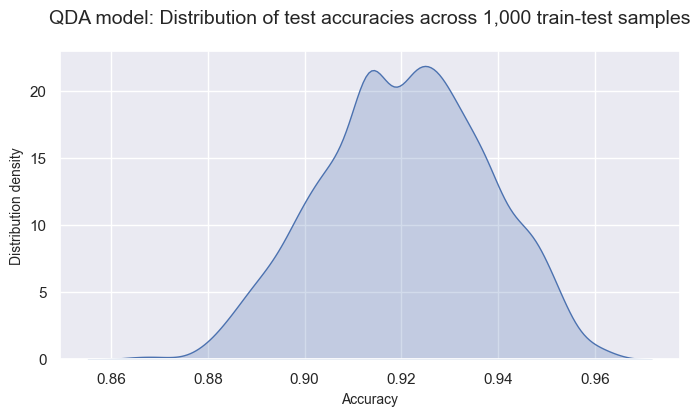

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Select data to use
target = df_actors["Lead numeric"]
features = df_actors[
    [
        "Total words",
        "Number words female",
        "Female word share",
        "Number of words lead",
        "Lead word share",
        "Difference in words lead and co-lead",
        "Total actors",
        "Female actor share",
        "Age Lead",
        "Age Co-Lead",
        "Mean Age Male",
        "Mean Age Female",
    ]
]

features = features.replace([np.inf, -np.inf, np.nan], 0)
features = StandardScaler().fit_transform(features)

test_accuracies = []

for i in range(1000):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    qda_model = QDA()
    qda_model.fit(x_train, y_train)
    score = qda_model.score(x_test, y_test)
    test_accuracies.append(score)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

plt.figure(figsize=(8, 4))
sns.kdeplot(test_accuracies, fill=True, bw_adjust=0.8)

# Formatting
plt.title(
    "QDA model: Distribution of test accuracies across 1,000 train-test samples",
    fontsize=14,
    pad=20,
)
plt.xlabel("Accuracy", fontsize=10)
plt.ylabel("Distribution density", fontsize=10)

print()
plt.show()